# Data Manipulation and Analysis Frameworks

**NumPy** is a Python library that helps users work with large, multi-dimensional arrays and matrices. It also offers a large collection of high-level mathematical functions that can operate on this array representation.

The Python Data Analysis Library (also known as **pandas**) is a versatile tool for manipulating and analyzing data sets. It also support the assembly of plots using matplotlib, and integrates well with other libraries that work with NumPy arrays.

In pandas, data is organzied into **data frames**. A data frame is a data structure that stores data sets in a tabular format. In this tabular format, each row and column is given a label.

Pandas DataFrames are documented at http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html.

## Dependencies

In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
# Use `python -m pip install pandas_datareader` to support the below.
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from datetime import datetime

%matplotlib inline

## Fetching, storing, and retrieving data sets

For demonstration purposes, we'll use a library already included within pandas that fetches data from standard online sources, such as Yahoo! Finance. More information on what types of data you can fetch is at https://github.com/pydata/pandas-datareader/blob/master/docs/source/remote_data.rst.

In [10]:
stocks = 'YELP'
data_source = 'robinhood'
rh_stocks = web.DataReader(stocks, data_source)

In [11]:
rh_stocks.head()

close_price high_price  interpolated  low_price open_price  \
symbol begins_at                                                               
YELP   2017-09-12   43.850000  44.030000         False  43.510000  43.740000   
       2017-09-13   42.950000  43.800000         False  42.625000  43.800000   
       2017-09-14   42.910000  43.030000         False  42.520000  42.750000   
       2017-09-15   43.570000  43.700000         False  42.760000  42.910000   
       2017-09-18   43.500000  44.230000         False  43.350000  43.800000   

                  session   volume  
symbol begins_at                    
YELP   2017-09-12     reg  1295504  
       2017-09-13     reg  1908324  
       2017-09-14     reg  1190931  
       2017-09-15     reg  4243413  
       2017-09-18     reg  1261139

In [12]:
type(rh_stocks)

pandas.core.frame.DataFrame

In [13]:
rh_stocks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, (YELP, 2017-09-12 00:00:00) to (YELP, 2018-09-11 00:00:00)
Data columns (total 7 columns):
close_price     252 non-null object
high_price      252 non-null object
interpolated    252 non-null bool
low_price       252 non-null object
open_price      252 non-null object
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), int64(1), object(5)
memory usage: 14.9+ KB


### Reading data from a comma-separated values (CSV) file

In [14]:
rh_stocks.to_csv('rh_data.csv')
print(open('rh_data.csv').read())

symbol,begins_at,close_price,high_price,interpolated,low_price,open_price,session,volume
YELP,2017-09-12,43.850000,44.030000,False,43.510000,43.740000,reg,1295504
YELP,2017-09-13,42.950000,43.800000,False,42.625000,43.800000,reg,1908324
YELP,2017-09-14,42.910000,43.030000,False,42.520000,42.750000,reg,1190931
YELP,2017-09-15,43.570000,43.700000,False,42.760000,42.910000,reg,4243413
YELP,2017-09-18,43.500000,44.230000,False,43.350000,43.800000,reg,1261139
YELP,2017-09-19,43.850000,44.070000,False,43.040100,43.500000,reg,859142
YELP,2017-09-20,44.170000,44.240000,False,43.440000,43.780000,reg,940095
YELP,2017-09-21,43.610000,44.070000,False,43.050000,44.070000,reg,769355
YELP,2017-09-22,43.420000,44.000000,False,43.240000,43.690000,reg,1056873
YELP,2017-09-25,41.900000,43.129900,False,41.320000,43.030000,reg,2026892
YELP,2017-09-26,41.720000,42.421500,False,41.680000,42.110000,reg,1087678
YELP,2017-09-27,42.700000,42.790000,False,41.800000,42.090000,reg,1471632
YELP,2017-09-28,42.660000,

In [15]:
df = pd.read_csv('rh_data.csv')
df

,symbol,begins_at,close_price,high_price,interpolated,low_price,open_price,session,volume
0,YELP,2017-09-12,43.85,44.0300,False,43.5100,43.740,reg,1295504
1,YELP,2017-09-13,42.95,43.8000,False,42.6250,43.800,reg,1908324
2,YELP,2017-09-14,42.91,43.0300,False,42.5200,42.750,reg,1190931
3,YELP,2017-09-15,43.57,43.7000,False,42.7600,42.910,reg,4243413
4,YELP,2017-09-18,43.50,44.2300,False,43.3500,43.800,reg,1261139
5,YELP,2017-09-19,43.85,44.0700,False,43.0401,43.500,reg,859142
6,YELP,2017-09-20,44.17,44.2400,False,43.4400,43.780,reg,940095
7,YELP,2017-09-21,43.61,44.0700,False,43.0500,44.070,reg,769355
8,YELP,2017-09-22,43.42,44.0000,False,43.2400,43.690,reg,1056873
9,YELP,2017-09-25,41.90,43.1299,False,41.3200,43.030,reg,2026892


The number of rows in the DataFrame can be obtained in the following way.

In [16]:
len(df)

252

## Working with data columns in a DataFrame

Columns correspond to attributes (also known as features or feature dimensions).

In [17]:
df.columns

Index(['symbol', 'begins_at', 'close_price', 'high_price', 'interpolated',
       'low_price', 'open_price', 'session', 'volume'],
      dtype='object')

In [18]:
type(df.columns)

pandas.core.indexes.base.Index

A single column can be selected using the indexing/slicing syntax.

In [19]:
print(df.keys())
df['open_price']

Index(['symbol', 'begins_at', 'close_price', 'high_price', 'interpolated',
       'low_price', 'open_price', 'session', 'volume'],
      dtype='object')


0      43.740
1      43.800
2      42.750
3      42.910
4      43.800
5      43.500
6      43.780
7      44.070
8      43.690
9      43.030
10     42.110
11     42.090
12     42.380
13     42.620
14     43.800
15     44.210
16     45.630
17     46.050
18     46.100
19     45.280
20     45.550
21     43.930
22     43.920
23     43.730
24     43.910
25     43.360
26     43.860
27     44.160
28     44.960
29     44.520
        ...  
222    37.140
223    37.000
224    37.270
225    37.930
226    38.000
227    38.770
228    38.900
229    44.000
230    48.030
231    49.560
232    47.010
233    47.490
234    47.340
235    46.050
236    45.240
237    44.680
238    44.225
239    44.275
240    45.610
241    46.690
242    47.000
243    46.560
244    46.930
245    46.680
246    46.890
247    46.590
248    45.000
249    44.590
250    45.440
251    45.020
Name: open_price, Length: 252, dtype: float64

### Types in pandas

Data frames are their own type. The columns of a data frame are ```Series``` objects (in many ways similar to a list).

In [20]:
type(df['open_price'])

pandas.core.series.Series

There are other ways of selecting columns within a data frame.

In [21]:
df.open_price

0      43.740
1      43.800
2      42.750
3      42.910
4      43.800
5      43.500
6      43.780
7      44.070
8      43.690
9      43.030
10     42.110
11     42.090
12     42.380
13     42.620
14     43.800
15     44.210
16     45.630
17     46.050
18     46.100
19     45.280
20     45.550
21     43.930
22     43.920
23     43.730
24     43.910
25     43.360
26     43.860
27     44.160
28     44.960
29     44.520
        ...  
222    37.140
223    37.000
224    37.270
225    37.930
226    38.000
227    38.770
228    38.900
229    44.000
230    48.030
231    49.560
232    47.010
233    47.490
234    47.340
235    46.050
236    45.240
237    44.680
238    44.225
239    44.275
240    45.610
241    46.690
242    47.000
243    46.560
244    46.930
245    46.680
246    46.890
247    46.590
248    45.000
249    44.590
250    45.440
251    45.020
Name: open_price, Length: 252, dtype: float64

In [22]:
df[['open_price','close_price']].head()

,open_price,close_price
0,43.74,43.85
1,43.80,42.95
2,42.75,42.91
3,42.91,43.57
4,43.80,43.50


In [23]:
df.begins_at.head(10)

0    2017-09-12
1    2017-09-13
2    2017-09-14
3    2017-09-15
4    2017-09-18
5    2017-09-19
6    2017-09-20
7    2017-09-21
8    2017-09-22
9    2017-09-25
Name: begins_at, dtype: object

In [24]:
df.begins_at.tail(10)

242    2018-08-28
243    2018-08-29
244    2018-08-30
245    2018-08-31
246    2018-09-04
247    2018-09-05
248    2018-09-06
249    2018-09-07
250    2018-09-10
251    2018-09-11
Name: begins_at, dtype: object

If a column name happens to have whitespace in it, the indexing/slicing notation can be used (e.g., `df['Example Column']`).

Column names can be changed.

In [25]:
new_column_names = [x.lower().replace('_','-') for x in df.columns]
df.columns = new_column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
symbol          252 non-null object
begins-at       252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 16.1+ KB


This can be useful as a way to normalize column names (e.g., removing whitespace).

## DataFrame methods

A DataFrame object has a variety of useful methods.

In [27]:
df.mean()

close-price     4.344111e+01
high-price      4.407275e+01
interpolated    0.000000e+00
low-price       4.279567e+01
open-price      4.342161e+01
volume          1.618623e+06
dtype: float64

Notice that ```mean``` automatically ignores columns that would not lead to a meaningful result (such as the date information).

In [28]:
df.std()

close-price     2.469390e+00
high-price      2.470945e+00
interpolated    0.000000e+00
low-price       2.447328e+00
open-price      2.449788e+00
volume          1.989818e+06
dtype: float64

In [29]:
df.median()

close-price          43.63
high-price           44.18
interpolated          0.00
low-price            43.19
open-price           43.79
volume          1225542.00
dtype: float64

In [30]:
df['open-price'].mean()

43.42160714285715

## Using plotting methods with a DataFrame

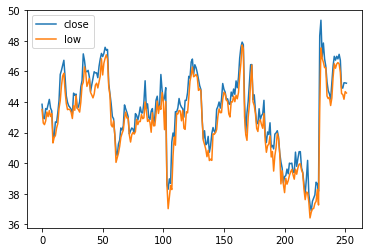

In [31]:
df['close-price'].plot(label='close')
df['low-price'].plot(label='low')
plt.legend(loc='best')

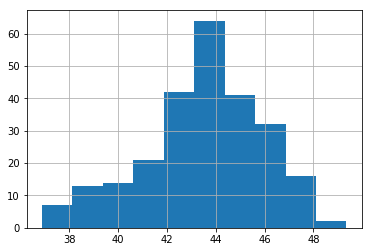

In [32]:
df['close-price'].hist()

## Bulk operations over data in a DataFrame

Methods like `sum()` and `std()` work on entire columns. We can also run our own functions across all values in a column (or row) using `.apply()`.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
symbol          252 non-null object
begins-at       252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 16.1+ KB


In [34]:
rh_stocks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 252 entries, (YELP, 2017-09-12 00:00:00) to (YELP, 2018-09-11 00:00:00)
Data columns (total 7 columns):
close_price     252 non-null object
high_price      252 non-null object
interpolated    252 non-null bool
low_price       252 non-null object
open_price      252 non-null object
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), int64(1), object(5)
memory usage: 14.9+ KB


In [35]:
df['begins-at'].head()

0    2017-09-12
1    2017-09-13
2    2017-09-14
3    2017-09-15
4    2017-09-18
Name: begins-at, dtype: object

In [36]:
type(df['begins-at'][1])

str

The `values` property of the column returns a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [37]:
first_date = df['begins-at'].values[0]
first_date

'2017-09-12'

In [38]:
datetime.strptime(str(first_date).split("T")[0], "%Y-%m-%d")

datetime.datetime(2017, 9, 12, 0, 0)

In [39]:
transform = lambda d: str(d).split("T")[0].split(" ")[0]
df['begins-at'] = df['begins-at'].apply(transform)
df['begins-at'].head()

0    2017-09-12
1    2017-09-13
2    2017-09-14
3    2017-09-15
4    2017-09-18
Name: begins-at, dtype: object

Each row in a DataFrame is associated with an index, which is a label that uniquely identifies that row. The row indices so far have been auto-generated by pandas, and are simply integers starting from 0.

Instead, we can use dates instead of integers for indices. Overwriting the index is as easy as assigning to the `index` property of the DataFrame.

In [40]:
df.index = df['begins-at']
df.head()

,symbol,begins-at,close-price,high-price,interpolated,low-price,open-price,session,volume
begins-at,,,,,,,,,
2017-09-12,YELP,2017-09-12,43.85,44.03,False,43.510,43.74,reg,1295504
2017-09-13,YELP,2017-09-13,42.95,43.80,False,42.625,43.80,reg,1908324
2017-09-14,YELP,2017-09-14,42.91,43.03,False,42.520,42.75,reg,1190931
2017-09-15,YELP,2017-09-15,43.57,43.70,False,42.760,42.91,reg,4243413
2017-09-18,YELP,2017-09-18,43.50,44.23,False,43.350,43.80,reg,1261139


Now that we have made an index based on date, we can drop the original `begins-at` column.

In [41]:
df = df.drop(['begins-at'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-09-12 to 2018-09-11
Data columns (total 8 columns):
symbol          252 non-null object
close-price     252 non-null float64
high-price      252 non-null float64
interpolated    252 non-null bool
low-price       252 non-null float64
open-price      252 non-null float64
session         252 non-null object
volume          252 non-null int64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 16.0+ KB


Now if we extract a column, it will also be indexed by date.

In [42]:
df['open-price'].head()

begins-at
2017-09-12    43.74
2017-09-13    43.80
2017-09-14    42.75
2017-09-15    42.91
2017-09-18    43.80
Name: open-price, dtype: float64

## Accessing rows within a DataFrame

We have seen how to access a column of the DataFrame. To access a row, we need to use a different syntax.

For example, To access a row by its index value, use the `.loc()` method.

In [78]:
df.loc['2017-09-12']

symbol             YELP
close-price       43.85
high-price        44.03
interpolated      False
low-price         43.51
open-price        43.74
session             reg
volume          1295504
Name: 2017-09-12, dtype: object

To access a row by its sequence number (i.e., like an array index), use `.iloc()` (which stands for "integer location").

To iterate over the rows, use `.iterrows()`.

In [45]:
num_positive_days = 0
for (idx, row) in df.iterrows():
    if row['close-price'] > row['open-price']:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))

The total number of positive-gain days is 124.
